In [3]:
cd ../..

/Users/mourad/workspace/polyaxon


In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import polyaxon as plx
from tensorflow.python.estimator.inputs.inputs import numpy_input_fn, pandas_input_fn

from polyaxon.examples.timeseries import create_experiment_json_fn, generate_data

exp = create_experiment_json_fn('/tmp/polyaxon_logs/timeseries')
X, y = generate_data(np.sin, np.linspace(0, 1000, 10000, dtype=np.float32), 7, seperate=False)
def get_test_inputs():
    _x = {'source_ids': X['test']}
    _y = y['test']

    return numpy_input_fn(_x, _y, shuffle=False)

predicted = [i['results'] for i in exp.estimator.predict(get_test_inputs(), hooks=[])]

INFO:tensorflow:Using config: {'_save_checkpoints_secs': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_task_type': None, '_model_dir': None, '_num_ps_replicas': 0, '_master': '', '_environment': 'local', '_keep_checkpoint_every_n_hours': 4, '_is_chief': True, '_task_id': 0, '_save_summary_steps': 100, '_num_worker_replicas': 0, '_evaluation_master': '', '_save_checkpoints_steps': 100, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x113c3d240>, '_keep_checkpoint_max': 5}
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/timeseries/model.ckpt-14903


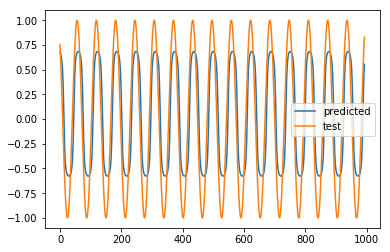

In [7]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])